# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")

### Step 4. See the first 10 entries

In [3]:
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [4]:
# Solution 1
data.shape[0]


4622

In [5]:
# Solution 2
len(data)


4622

### Step 6. What is the number of columns in the dataset?

In [6]:
len(data.columns)

5

### Step 7. Print the name of all the columns.

In [7]:
data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [8]:
data.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

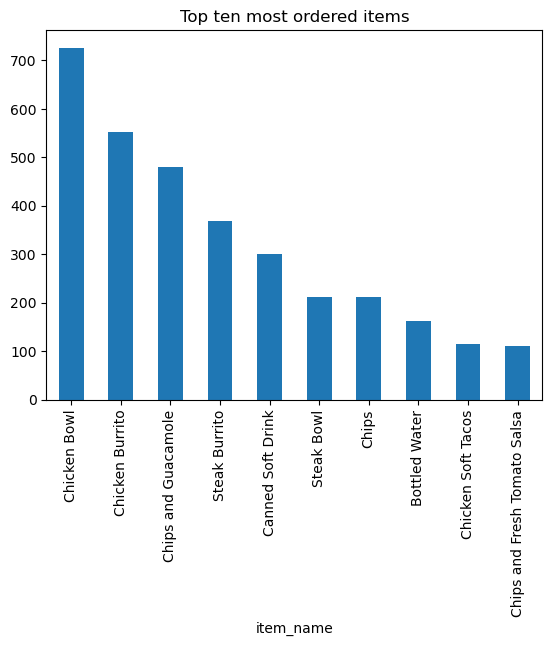

In [9]:
data.item_name.value_counts()\
.sort_values(ascending=False)[:10]\
.plot(kind = "bar")

plt.title("Top ten most ordered items")
plt.show()

### Step 10. For the most-ordered item, how many items were ordered?

In [10]:
data.item_name.value_counts()[0]

726

### Step 11. What was the most ordered item in the choice_description column?

In [11]:
data.choice_description=data.choice_description.astype(str)

In [12]:
counter = Counter()
for row in data.choice_description:
    row_list = row.split(",")
    counter.update(Counter(combinations(row_list,1)))

In [13]:
choices = pd.DataFrame(counter.keys())
choices["values"] = counter.values()
choices = choices.rename(columns={0:"Choice"})
choices = choices.loc[1:,:]

In [14]:
choices

,Choice,values
1,[Clementine],8
2,[Apple],6
3,[Tomatillo-Red Chili Salsa (Hot),142
4,[Black Beans,335
5,Rice,900
...,...,...
100,[Rice],1
101,[White Rice],2
102,[Rice,2
103,[Brown Rice],1


In [16]:
choices.Choice = choices.Choice.astype(str)
choices =choices.sort_values(by="values",ascending=False).reset_index(drop=True)

In [17]:
choices["values"]=choices["values"].astype(int)

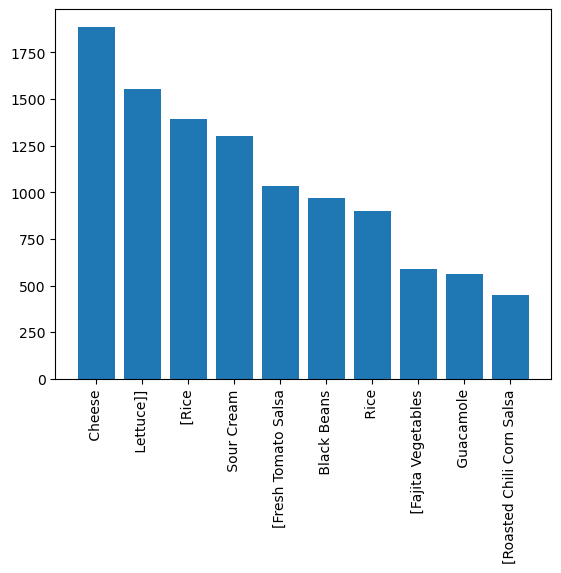

In [18]:
choice10 = choices["Choice"][:10].to_list()
values10=choices["values"][:10].to_list()

plt.bar(choice10,values10)
plt.xticks(rotation ="vertical")

plt.show()

### Step 12. How many items were orderd in total?

In [19]:
data.quantity.sum()

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [20]:
data.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [21]:
data.item_price = data.item_price.str.extract(r"(\d+\.\d+)")

In [23]:
data.item_price=data.item_price.astype(float)

#### Step 13.c. Check the item price type

In [25]:
data.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [26]:
data["total_price"] = data.loc[:,"item_price"]*data.loc[:,"quantity"]

In [28]:
revenue =data.total_price.sum()

In [29]:
revenue

39237.02

### Step 15. How many orders were made in the period?

In [30]:
data.order_id.nunique()

1834

### Step 16. What is the average revenue amount per order?

In [32]:
avg_revenue = revenue / data.order_id.nunique()
avg_revenue

21.39423118865867

### Step 17. How many different items are sold?

In [34]:
data.item_name.nunique()

50